In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
import Functions as f

In [2]:
data = pd.read_csv('../data/GPUbenchmark.csv').to_numpy()

The main objective is to find the hypothesis f(X) = beta0 + beta1X1 + ... + beta6X6, which
estimates the linear relation between the graphic card properties and the benchmark result.

 1. Start by normalizing X using Xn = (X - mu) / sigma and plot the dataset

In [3]:
Xe = np.array([np.ones(data.shape[0]), data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5]]).T
y = data[:, 6]


mu = np.mean(Xe, axis=0)
sigma = np.std(Xe, axis=0)

Xn = (Xe - mu) / sigma

C:\Users\dimit\AppData\Local\Temp/ipykernel_21968/1964648708.py:8: RuntimeWarning: invalid value encountered in true_divide
  Xn = (Xe - mu) / sigma



2. Multivariate datasets are hard to visualize. However, to get a basic understanding it might
be a good idea to produce a plot Xi vs y for each one of the features. Use subplot(2,3,i)
to fit all six plots into a single figure. Make sure that each nomalized Xi is centralized around zero.

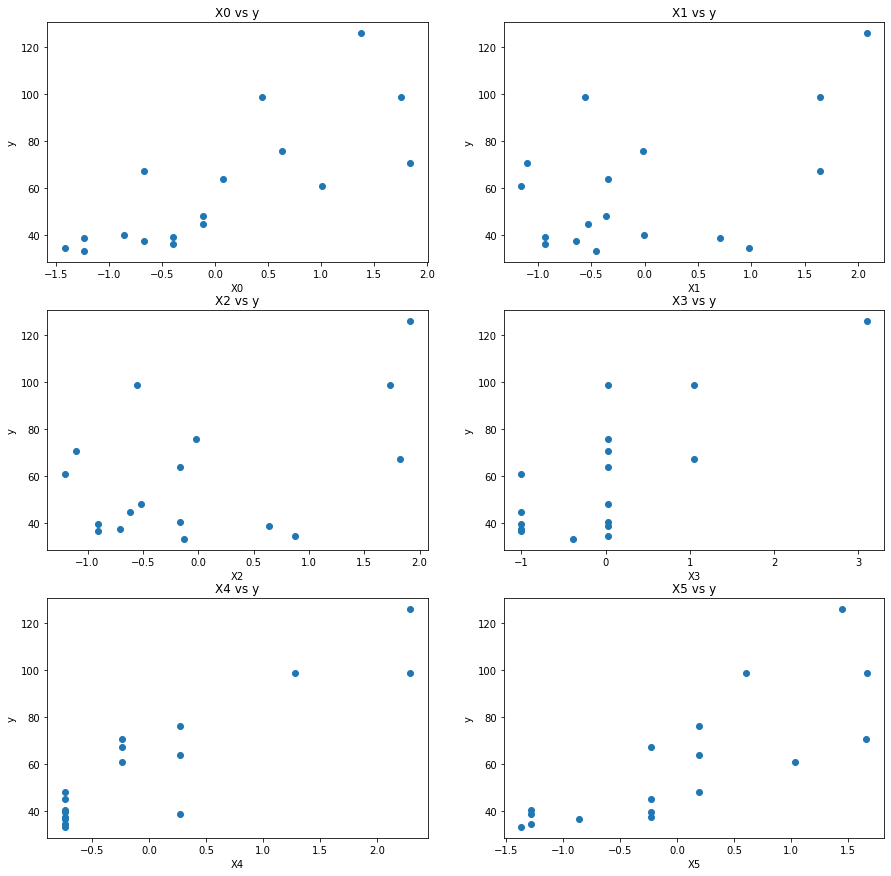

In [4]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(len(axes)):
    axes[i].scatter(Xn[:, i + 1], y)
    axes[i].set_title('X' + str(i) + ' vs y')
    axes[i].set_xlabel('X' + str(i))
    axes[i].set_ylabel('y')
plt.show()

3. Compute beta using the normal equation b = (xe.T * xe)^-1 * xe.T * y where Xe is the extended normalized matrix [1, X1, X2, ... X6].
What is the predicted benchmark result for a graphic card with the following (non-normalized) feature values?
2432, 1607, 1683, 8, 8, 256. The actual benchmark result is 114

In [5]:
Xn[:, 0] = 1

beta_normalized = np.linalg.inv(Xn.T.dot(Xn)).dot(Xn.T).dot(y)
beta = np.linalg.inv(Xe.T.dot(Xe)).dot(Xe.T).dot(y)

non_normalized_gpu = np.array([1, 2432, 1607, 1683, 8, 8, 256])
prediction = non_normalized_gpu.dot(beta)
print("The predicted value with non-normalized feature values is " + str(prediction))

The predicted value with non-normalized feature values is 110.03803694102669


4. What is the cost J(b) when using the beta computed by the normal equation above?

In [6]:
print(f.cost_function(Xn, y, beta, len(y)))

12261.474643635333


5. a) Find (and print) hyperparameters (alpha, N) such that you get within 1% of the final cost for the normal equation.

In [7]:
alpha = 0.001
NumOfIterations = 300

[59.38087902  8.28781353  2.18886043  2.74193869  4.92606969  8.58431323
  6.74009592]


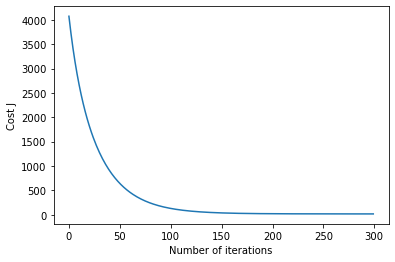

In [8]:
J_values = []
beta_gradient = f.gradient_descent(Xn, y, alpha, NumOfIterations, J_values)
print(beta_gradient) # normalized beta values from gradient descent

# plotting the cost function to show the decrease
plt.plot(range(NumOfIterations), J_values)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()


b) What is the predicted benchmark result for the example graphic card presented

In [9]:
normalized_gpu = non_normalized_gpu / np.linalg.norm(non_normalized_gpu)
prediction_normalized = normalized_gpu.dot(beta_gradient)
print("The predicted value with normalized feature values is " + str(prediction_normalized))

The predicted value with normalized feature values is 8.940734089983456
